# Assignment - Supervised Learning

## Objective

Data Analysis to identify the potential customers who have a higher probability of getting the loan.

## Dataset
BankLoan.csv

In [ ]:
## Necessary libraries are imported

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

import os

In [ ]:
# Dataset is read
df = pd.read_csv("BankLoan.csv")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Variables definition

- ID - Customer ID
- Age - Customer's age in completed years
- Experience - Number of years of professional experience.
- Income - Annual income of the customer (in $ 1000).
- ZIPCode - Home Address ZIP code.
- Family - Family size of the customer
- CCAvg - Avg. spending on credit cards per month - in thousands usd
- Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage - Value of house mortgage if any - in thousands usd
- Personal Loan - Did this customer accept the personal loan offered in the last campaign?
- Securities Account - Does the customer have a securities account with the bank?
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
- Online - Does the customer use internet banking facilities?
- CreditCard - Does the customer uses a credit card issued by UniversalBank?

### Categorical Feature:


- Family
- Education
- ID
- Zip Code
- Securities Account
- CD Account
- Online
- Credit Card

### Numerical feature:
    
- Age
- Experience
- Income
- CCAvg
- Mortage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Observation

- No Missing Values

In [ ]:
df.isna().apply(pd.value_counts)   #null value check

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


## Observation

- No Null Values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Observation

- Column 'Experience' has negative values

### Replacing the negative values with the mean value of the column

In [ ]:
any(df['Experience'] < 0)

True

In [ ]:
exp_med = df.loc[:,"Experience"].median()
df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

In [ ]:
any(df['Experience'] < 0)

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Univariate Analysis of the continuous variables - 1

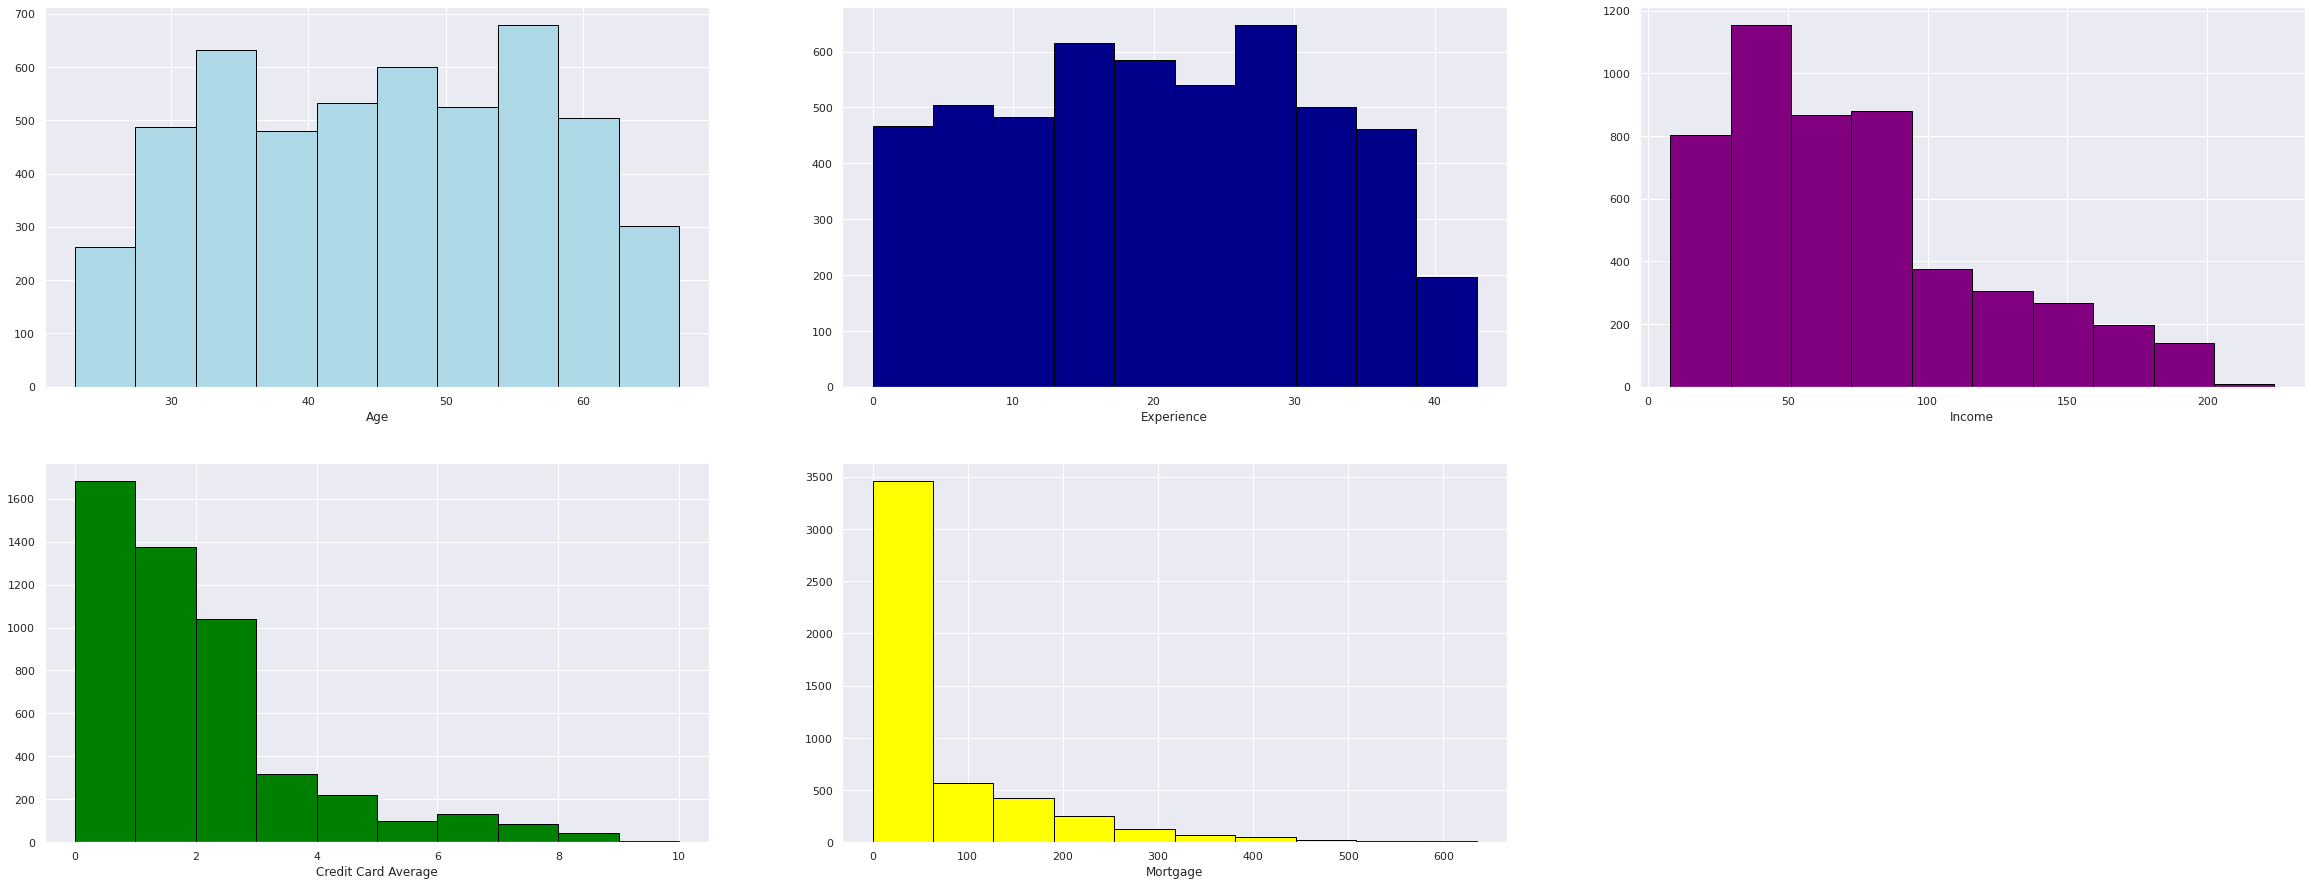

In [ ]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

## Observation

- Age & Experience seems to be quiet normally distributed

- Income, CC Average & Mortgage are highly skewed

In [ ]:
# Checking for Skewness of data

import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Experience),stats.skew(df.Income),stats.skew(df.CCAvg)
                                      ,stats.skew(df.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

,Skewness
Age,-0.029332
Experience,-0.014096
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


## Observation

- Age and Experience seems to be quiet Symmetrical

- Income, CCAvg and Mortgage are Positively skewed, as they are highly skewed there will be quiet a lot of extreme values


## Univariate Analysis of the continuous variables - 2

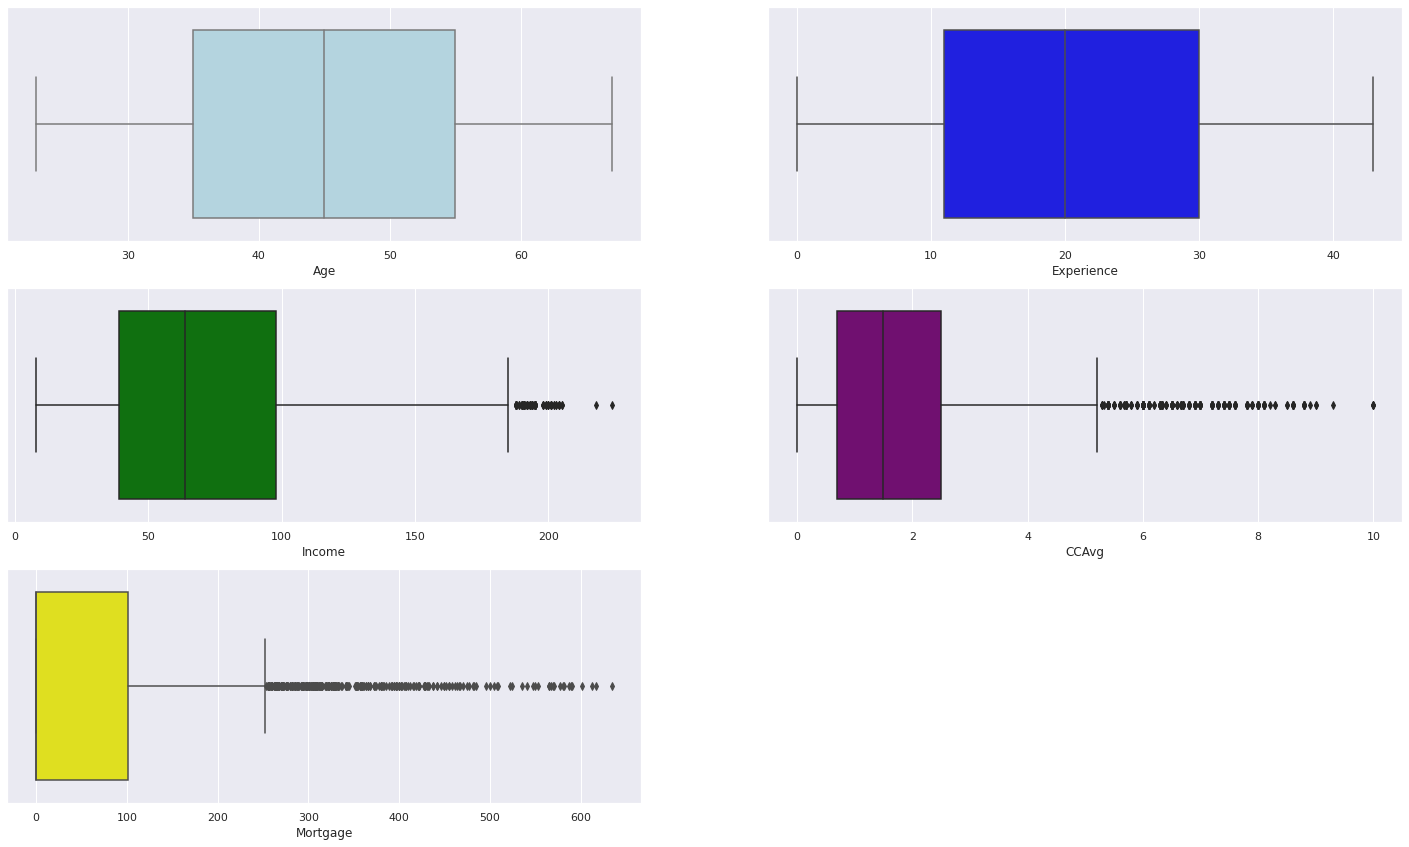

In [ ]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='lightblue')

plt.subplot(5,2,2)
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='green')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='purple')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='yellow')

## Inference

1. Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

2. Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.

3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

## Univariate Analysis of the categorical variables

Text(0.5, 1.0, 'Credit Card Distribution')

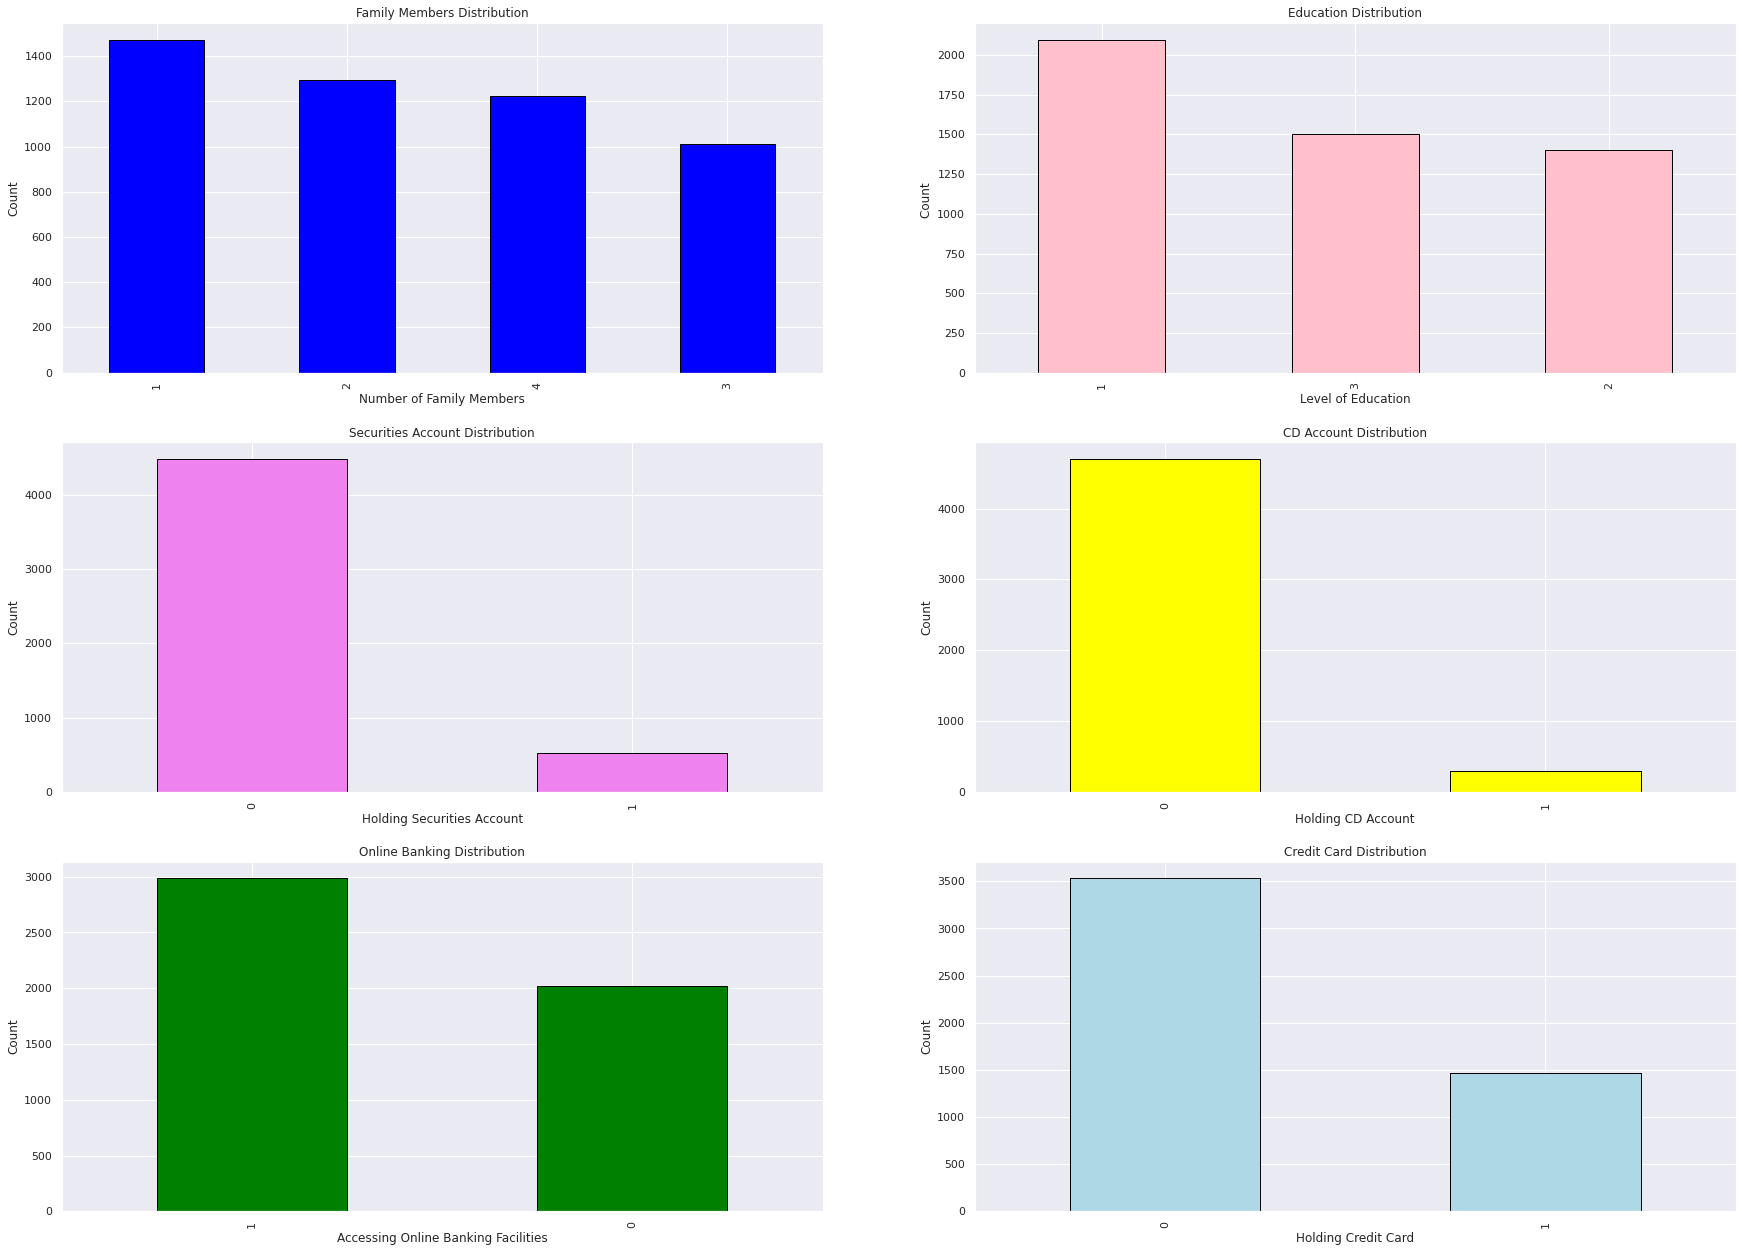

In [ ]:
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")



## Observations

- The variables family and education are ordinal variables. The distribution of families is evenly distributed
- It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible



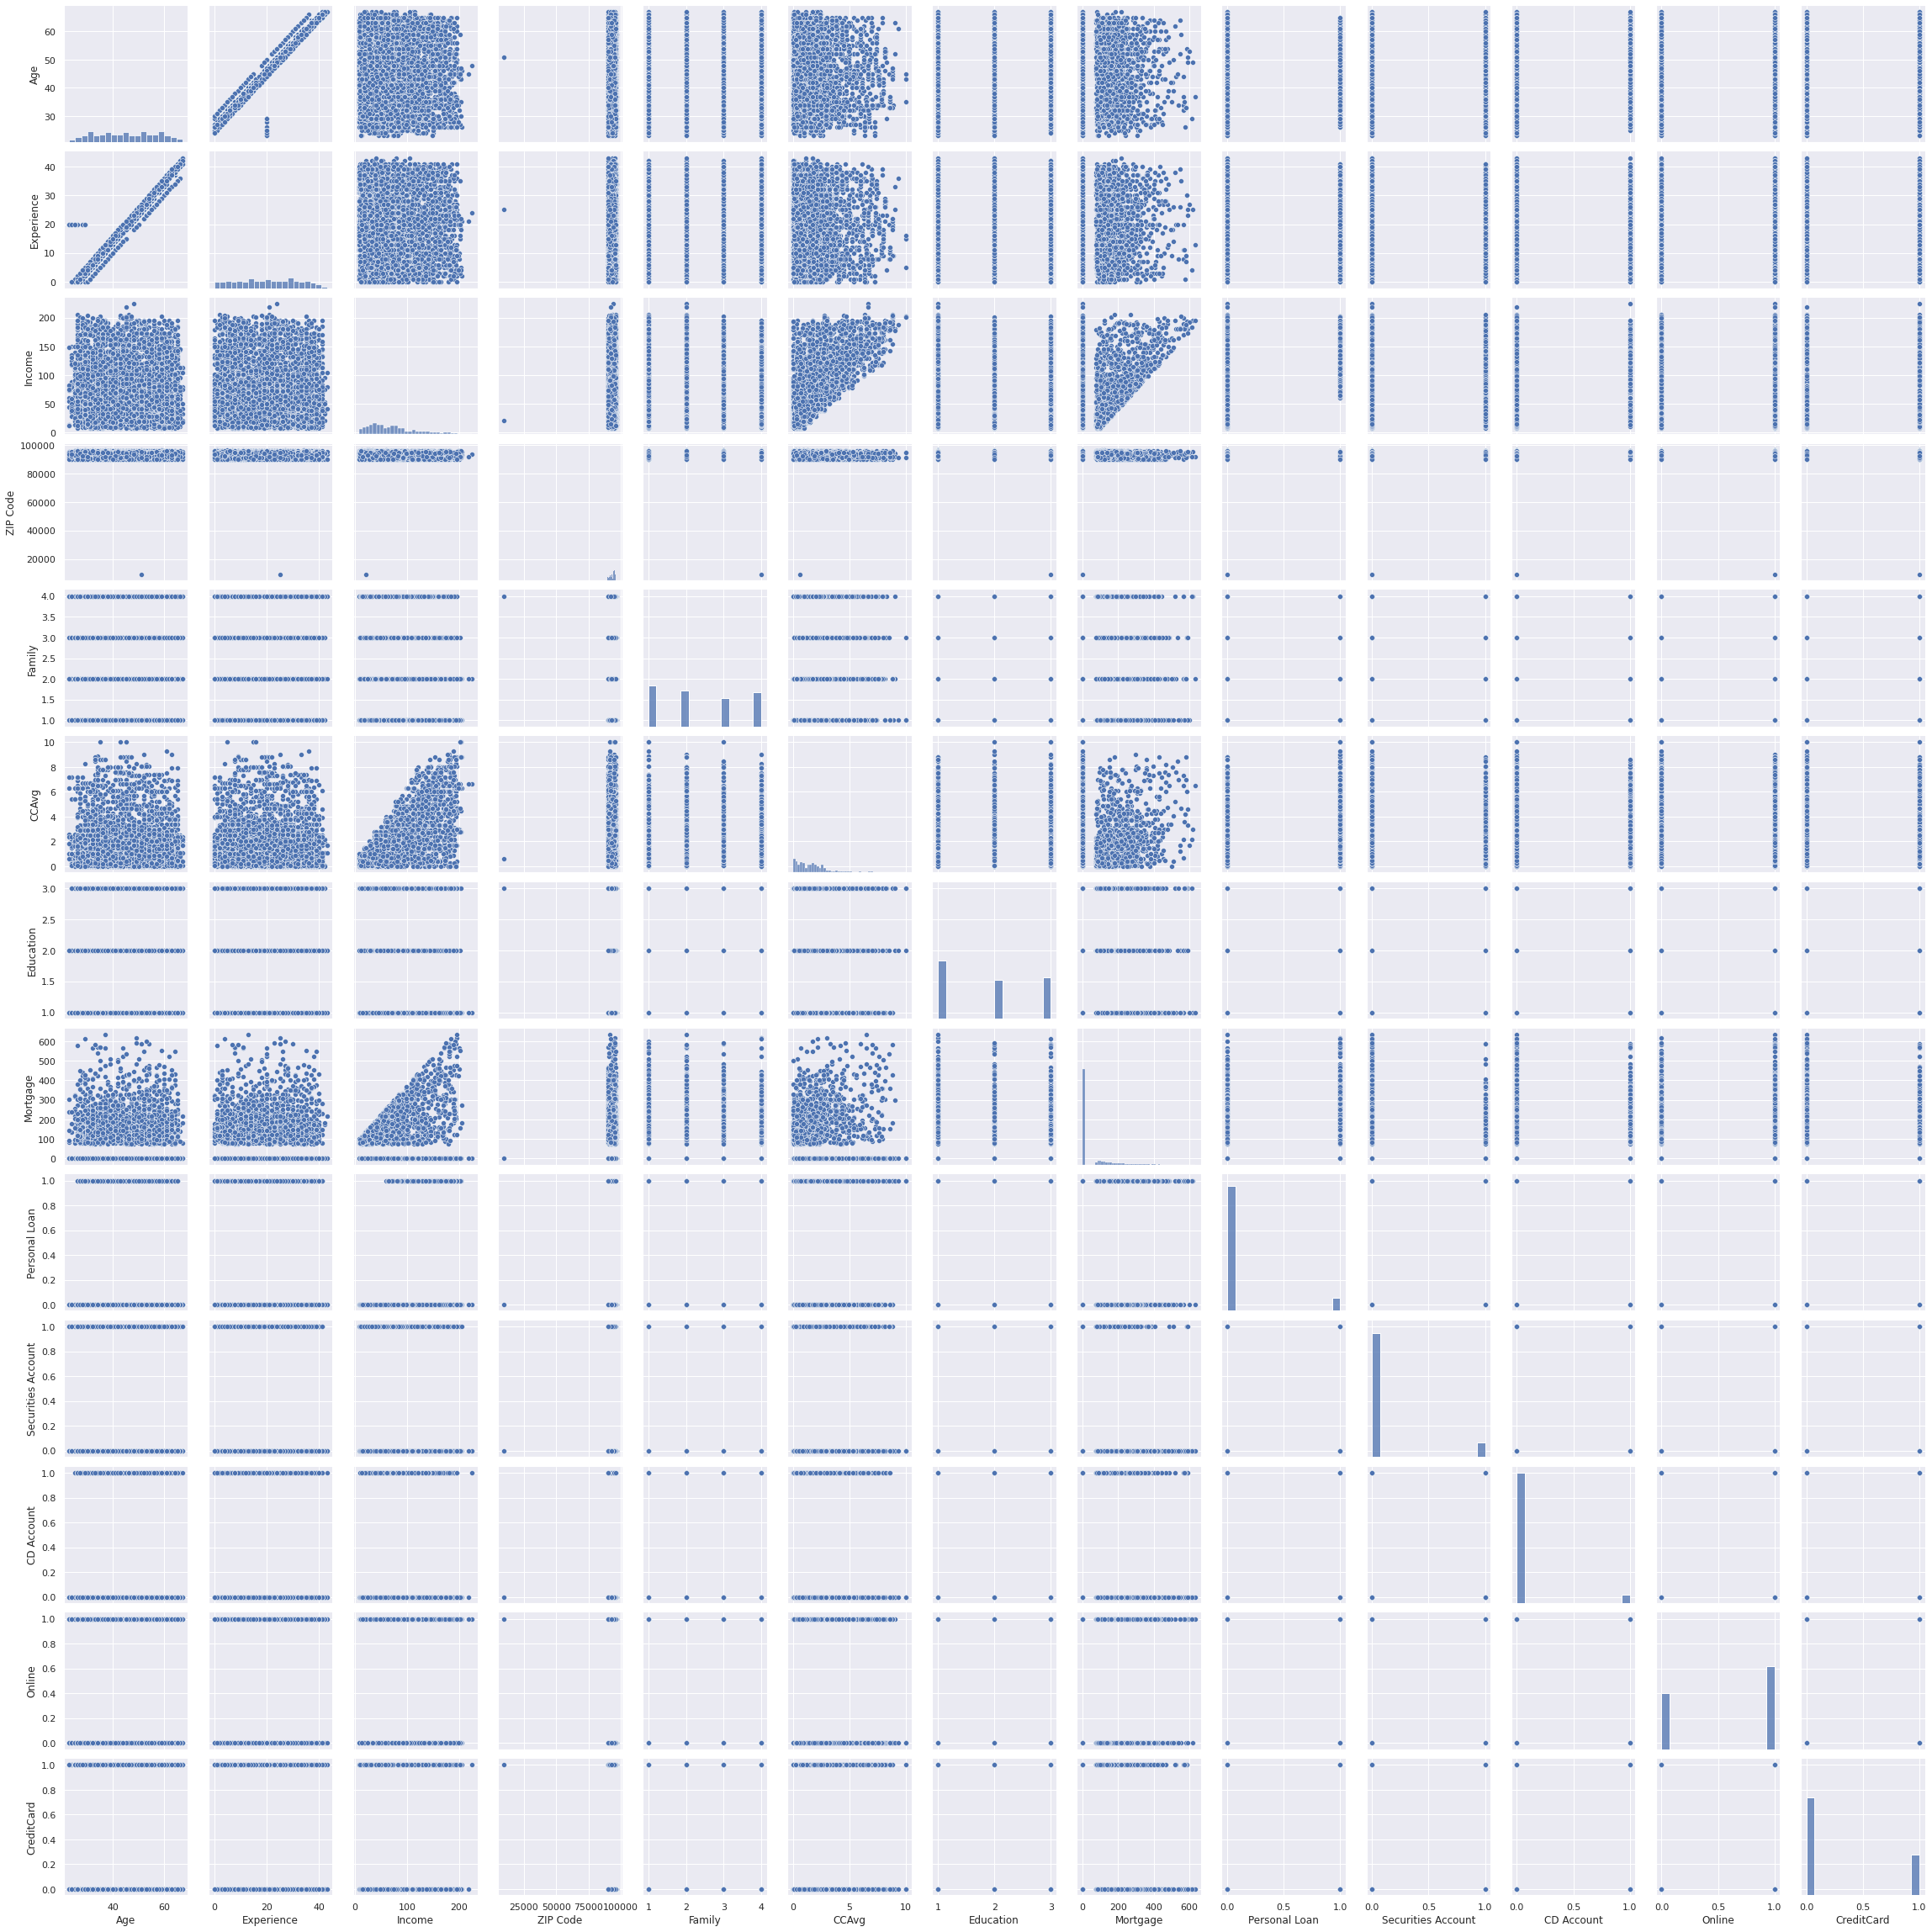

In [ ]:
#Pairplot

sns.pairplot(df.iloc[:,1:])

## Observation
- 'Age' has an association with 'Experience

## Dependant variable analysis

In [ ]:
df["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


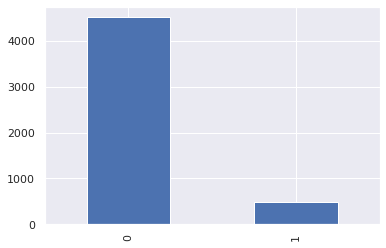

In [ ]:
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

## Influence of few attributes on 'Personal Loan' - Dependant Variable

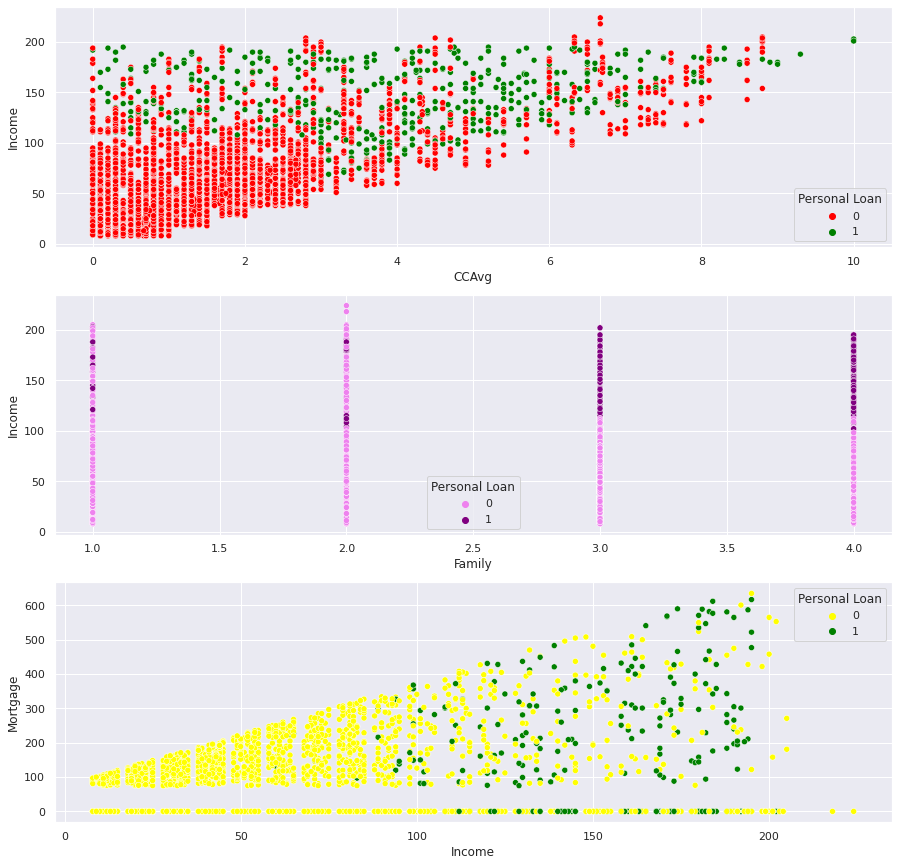

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(df.Family, df.Income, hue = df['Personal Loan'], palette= ['violet','purple'])

plt.subplot(3,1,3)
sns.scatterplot(df.Income, df.Mortgage, hue = df['Personal Loan'], palette= ['yellow','green'])

## Observation  


- The graph show persons who have personal loan have a higher credit card average.

- It is clearly visible that as the members of family increases (say >=3) the necessity of loan is also increasing.

- It is very precise that as the income increases (approx 100K) the mortgage value also increases gradually wiht the necessity of personal loan.

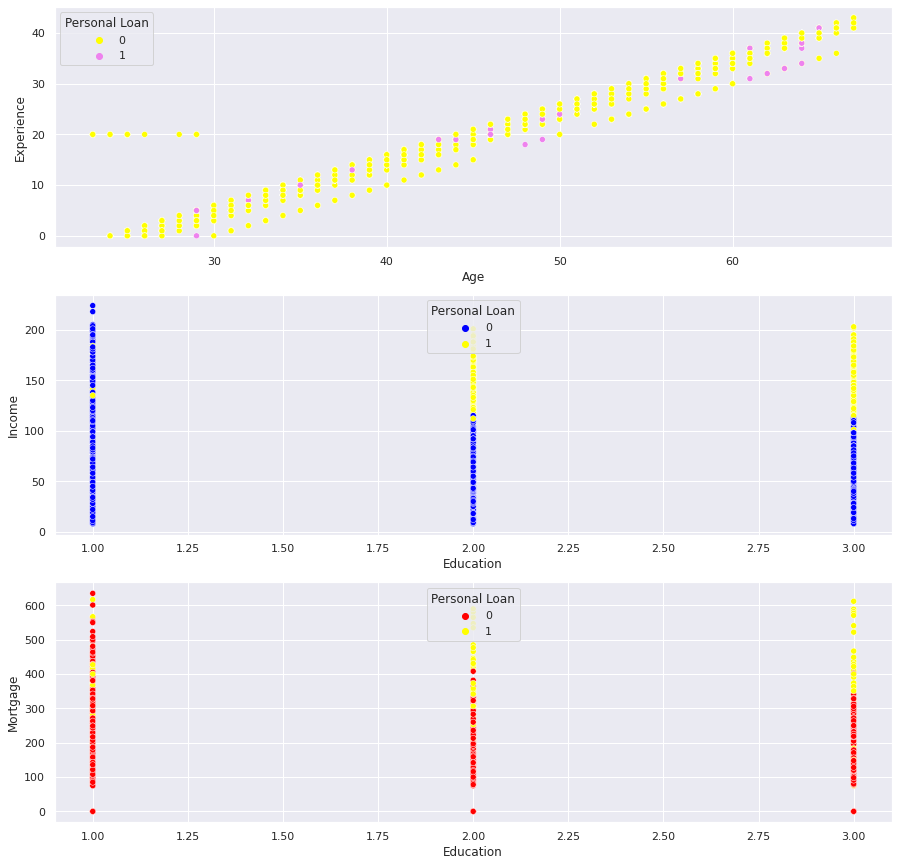

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.Age, df.Experience, hue = df['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(df.Education, df.Income, hue = df['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(df.Education, df.Mortgage, hue = df['Personal Loan'], palette= ['red','yellow'])

## Observation  

- 'Age' has a very strong association with 'Experience' but nothing gets affected with loan  attribute.
- It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
- Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.

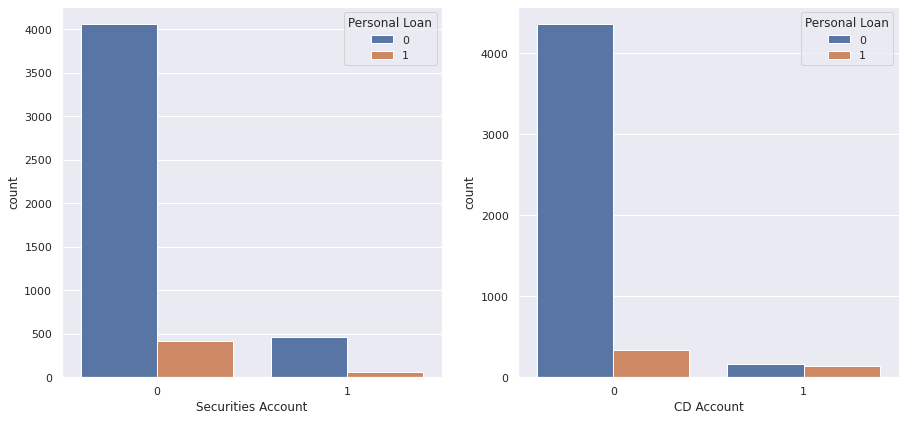

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan')

## Observation  


- Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
- Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well.

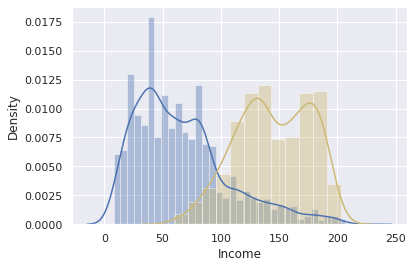

In [ ]:
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y')

## Observation
- The graph show those who have personal loan also have a higher income.

## Checking for correlation

In [ ]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


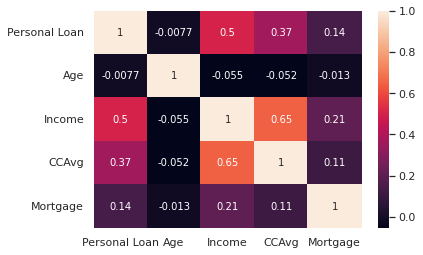

In [ ]:
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

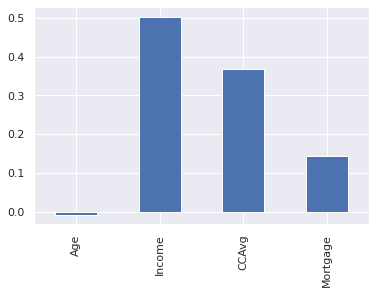

In [ ]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

## Observation
- The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

## Data Split 70:30 Ratio

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [ ]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression()

In [ ]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

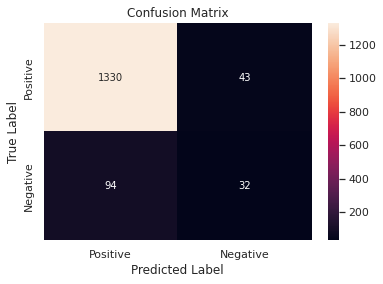

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Classification Report
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.43      0.25      0.32       126

    accuracy                           0.91      1499
   macro avg       0.68      0.61      0.63      1499
weighted avg       0.89      0.91      0.90      1499



## K-NN

Cross Validation

In [ ]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)

    # Predict the response
    Y_Pred = knn.predict(X_Test)

    # Evaluate accuracy
    scores = accuracy_score(Y_Test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_Train, Y_Train)
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9112741827885257


Misclassification Error vs K

Text(0, 0.5, 'Misclassification Error')

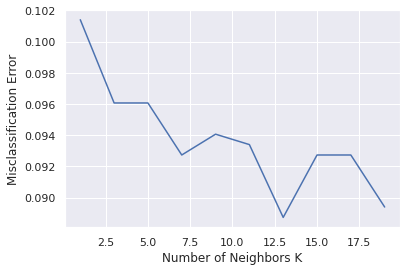

In [ ]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

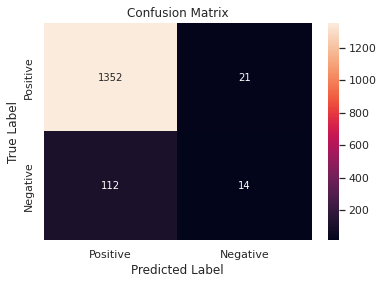

In [ ]:
# Confusion Matrix
cm1 = confusion_matrix(Y_Test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Classification Report
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1373
           1       0.40      0.11      0.17       126

    accuracy                           0.91      1499
   macro avg       0.66      0.55      0.56      1499
weighted avg       0.88      0.91      0.89      1499



## Naive Bayes

In [ ]:
# Model
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

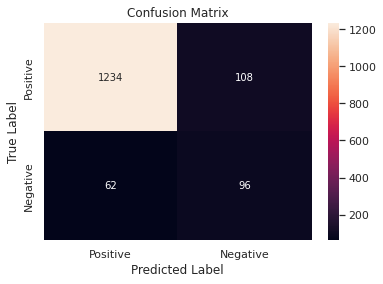

In [ ]:
# Confusion Matrix
cm2 = confusion_matrix(test_labels, prediction)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Classififcation Report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



## Model Comparison

KNN: 0.898600 (0.008902)
LR: 0.911200 (0.014784)
NB: 0.885600 (0.010385)


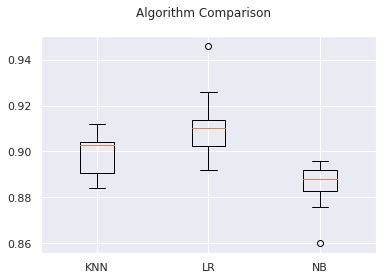

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Summary


- The aim of the Thera Bank is to convert there liability customers into loan customers.
- They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
- Three classification algorithms were used in this study.
- From the above graph , it seems like <strong>'Logistic Regression'</strong> algorithm have the highest accuracy and we can choose that as our final model